<a href="https://colab.research.google.com/github/elaineortsac3/projetos/blob/master/Alterando_cores_niveis_de_cinza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio Lena
## Etapa 1: Upload da imagem

In [6]:
#ajusta o limite para permitir a conversão de strings maiores em inteiros, para corrigir erros

import sys
sys.set_int_max_str_digits(10000)  # aumenta limite para conversão de strings longas

from PIL import Image, ImageOps
import numpy as np
from IPython.display import Image as IPImage, display


In [7]:
#A imagem Leonardo estava no formato .png por isso eu vou usar biblioteca para converter para .pmp

from google.colab import files

#Fiz upload da imagem do meu computador
uploaded = files.upload()


Saving Leonardo_Phoenix.png to Leonardo_Phoenix (2).png


### Etapa 2 - Abrir imagem PNG e transformar

In [8]:
#Abrindo a imagem PNG
img = Image.open("Leonardo_Phoenix.png")
img.show()

#largura e altura
largura, altura = img.size

#Salvo como PPM (formato texto - P3)
with open('Leonardo.ppm', 'w') as f:
    f.write('P3\n')
    f.write(f'{largura} {altura}\n')
    f.write('255\n')
    for y in range(altura):
        for x in range(largura):
            r, g, b = img.getpixel((x, y))
            f.write(f'{r} {g} {b} ')
        f.write('\n')

#Funções auxiliares

def ler_imagem_ppm(nome_arquivo):
    with open(nome_arquivo, 'r') as f:
        tipo = f.readline().strip()
        if tipo != 'P3':
            raise Exception('Formato PPM não suportado')
        # Ignorar comentários
        while True:
            linha = f.readline()
            if not linha.startswith('#'):
                largura, altura = map(int, linha.strip().split())
                break
        max_val = int(f.readline().strip())
        pixels = []
        for linha in f:
            if linha.startswith('#') or not linha.strip():
                continue
            pixels.extend(map(int, linha.strip().split()))
        return largura, altura, max_val, pixels

def salvar_imagem_ppm(nome_arquivo, largura, altura, max_val, pixels):
    with open(nome_arquivo, 'w') as f:
        f.write('P3\n')
        f.write(f'{largura} {altura}\n')
        f.write(f'{max_val}\n')
        for i in range(0, len(pixels), 3 * largura):
            linha_pixels = pixels[i:i + 3 * largura]
            linha_texto = ' '.join(map(str, linha_pixels))
            f.write(f'{linha_texto}\n')

def converter_para_cinza(pixels):
    cinza = []
    for i in range(0, len(pixels), 3):
        r = pixels[i]
        g = pixels[i + 1]
        b = pixels[i + 2]
        gray = int(0.299 * r + 0.587 * g + 0.114 * b)
        cinza.extend([gray, gray, gray])
    return cinza

def binarizar_imagem(pixels, limiar=128):
    binarizada = []
    for i in range(0, len(pixels), 3):
        gray = pixels[i]
        valor = 255 if gray >= limiar else 0
        binarizada.extend([valor, valor, valor])
    return binarizada

### Etapa 3 - Processamento de imagens

In [9]:
#Leitura imagem PPM
largura, altura, max_val, pixels = ler_imagem_ppm('Leonardo.ppm')

#Convertendo para tons de cinza
pixels_cinza = converter_para_cinza(pixels)
salvar_imagem_ppm('Leonardo_cinza.ppm', largura, altura, max_val, pixels_cinza)

#Binarizar imagem
pixels_bin = binarizar_imagem(pixels_cinza)
salvar_imagem_ppm('Leonardo_binaria.ppm', largura, altura, max_val, pixels_bin)

### Etapa 4 - Transformar imagens ppm em png

In [10]:
#Abrindo as imagens .ppm como PIL e salvar como .png
Image.open("Leonardo_cinza.ppm").save("Leonardo_cinza.png")
Image.open("Leonardo_binaria.ppm").save("Leonardo_binaria.png")


### Etapa 5 - Visualização

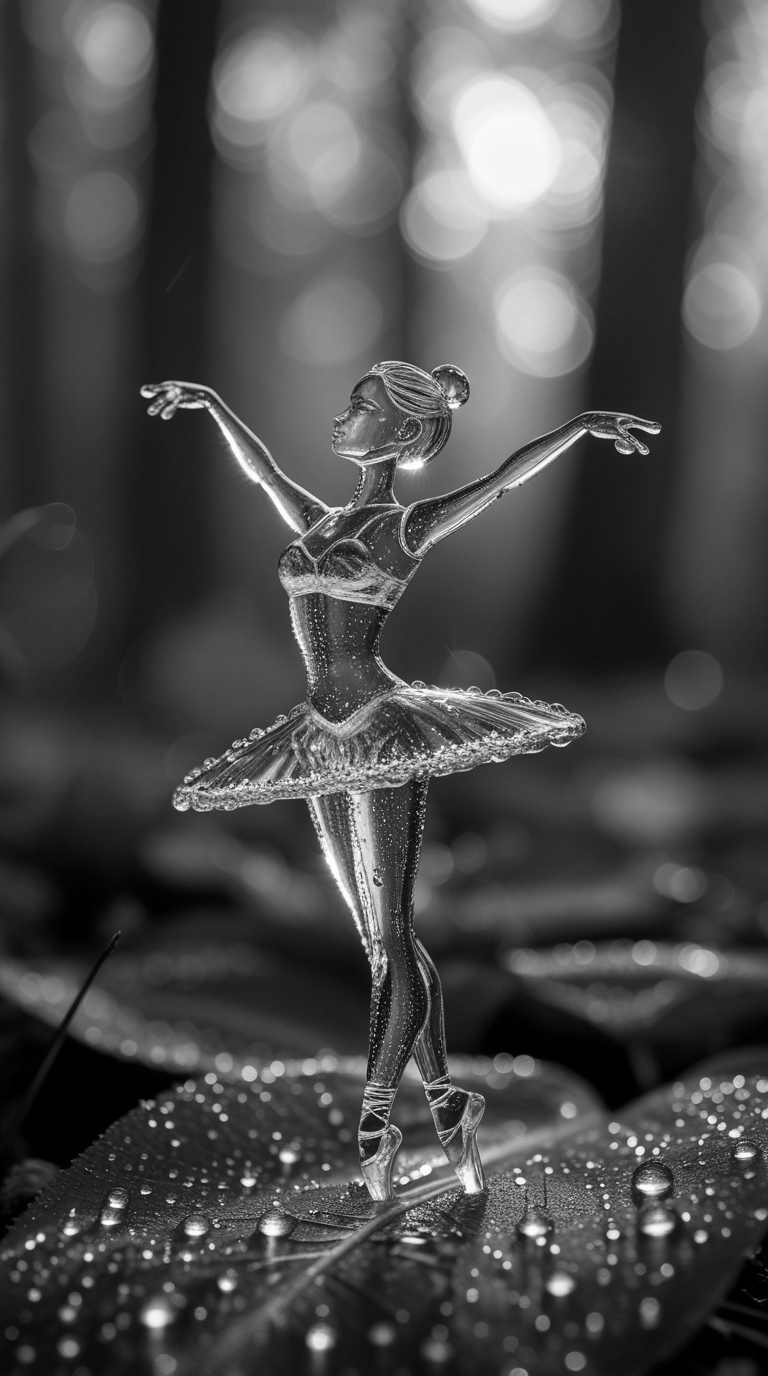

In [11]:
#Imagem niveis de Cinza
display(IPImage("Leonardo_cinza.png"))

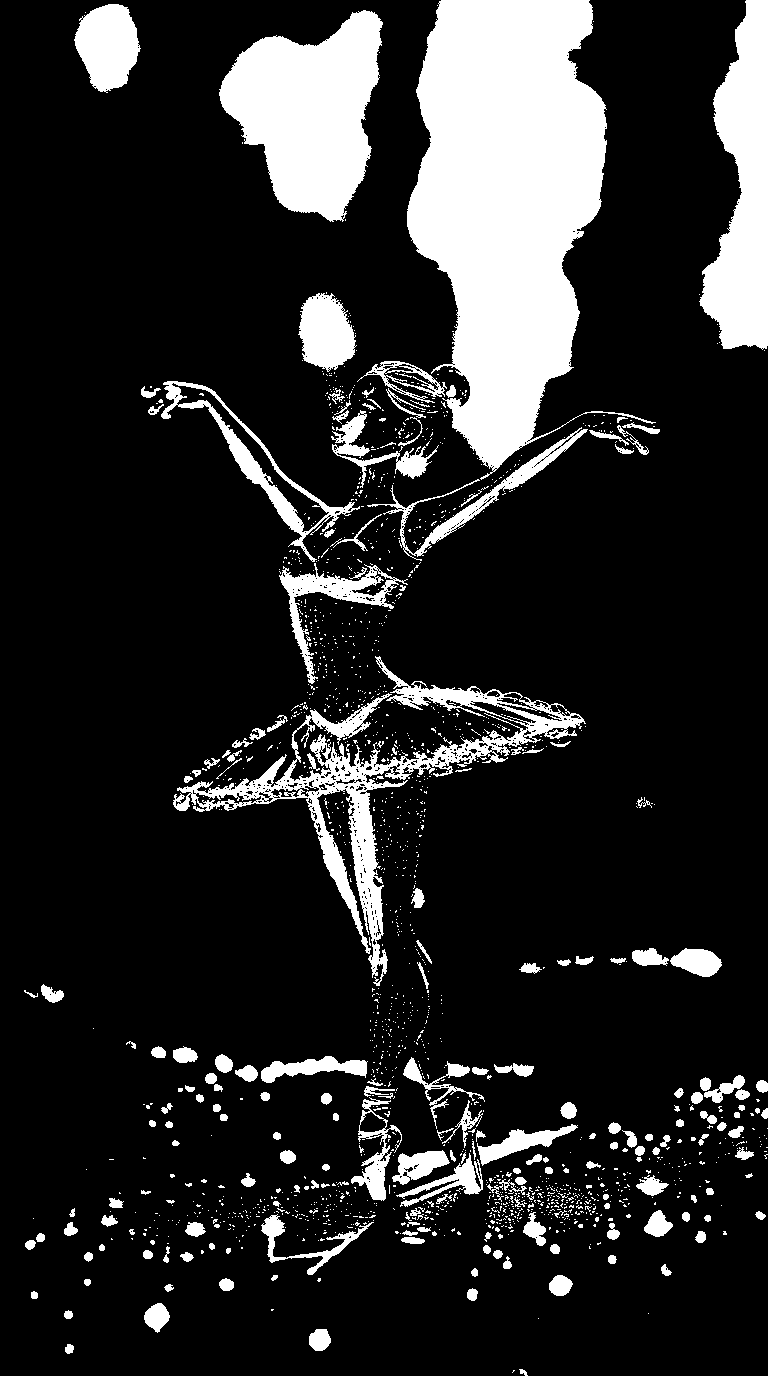

In [12]:
#Imagem Binaria
display(IPImage("Leonardo_binaria.png"))